In [8]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
from correlation import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data

In [9]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


### engineer nan values to mean

In [10]:
tx_nan = transform_to_nan(tx, -900)
tx_nan_mean, mean =transform_to_mean(tx_nan)
x = tx_nan_mean.copy()

### divide selon feature 22

In [11]:
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = separate_PRI_jet_num(x, y)
print("tx0 has shape {tx0} and y0 has shape {y0}".format(tx0=tx0.shape, y0=y0.shape))
print("tx1 has shape {tx1} and y1 has shape {y1}".format(tx1=tx1.shape, y1=y1.shape))
print("tx2 has shape {tx2} and y2 has shape {y2}".format(tx2=tx2.shape, y2=y2.shape))
print("tx3 has shape {tx3} and y3 has shape {y3}".format(tx3=tx3.shape, y3=y3.shape))

tx0 has shape (1985, 30) and y0 has shape (1985,)
tx1 has shape (1540, 30) and y1 has shape (1540,)
tx2 has shape (1043, 30) and y2 has shape (1043,)
tx3 has shape (432, 30) and y3 has shape (432,)


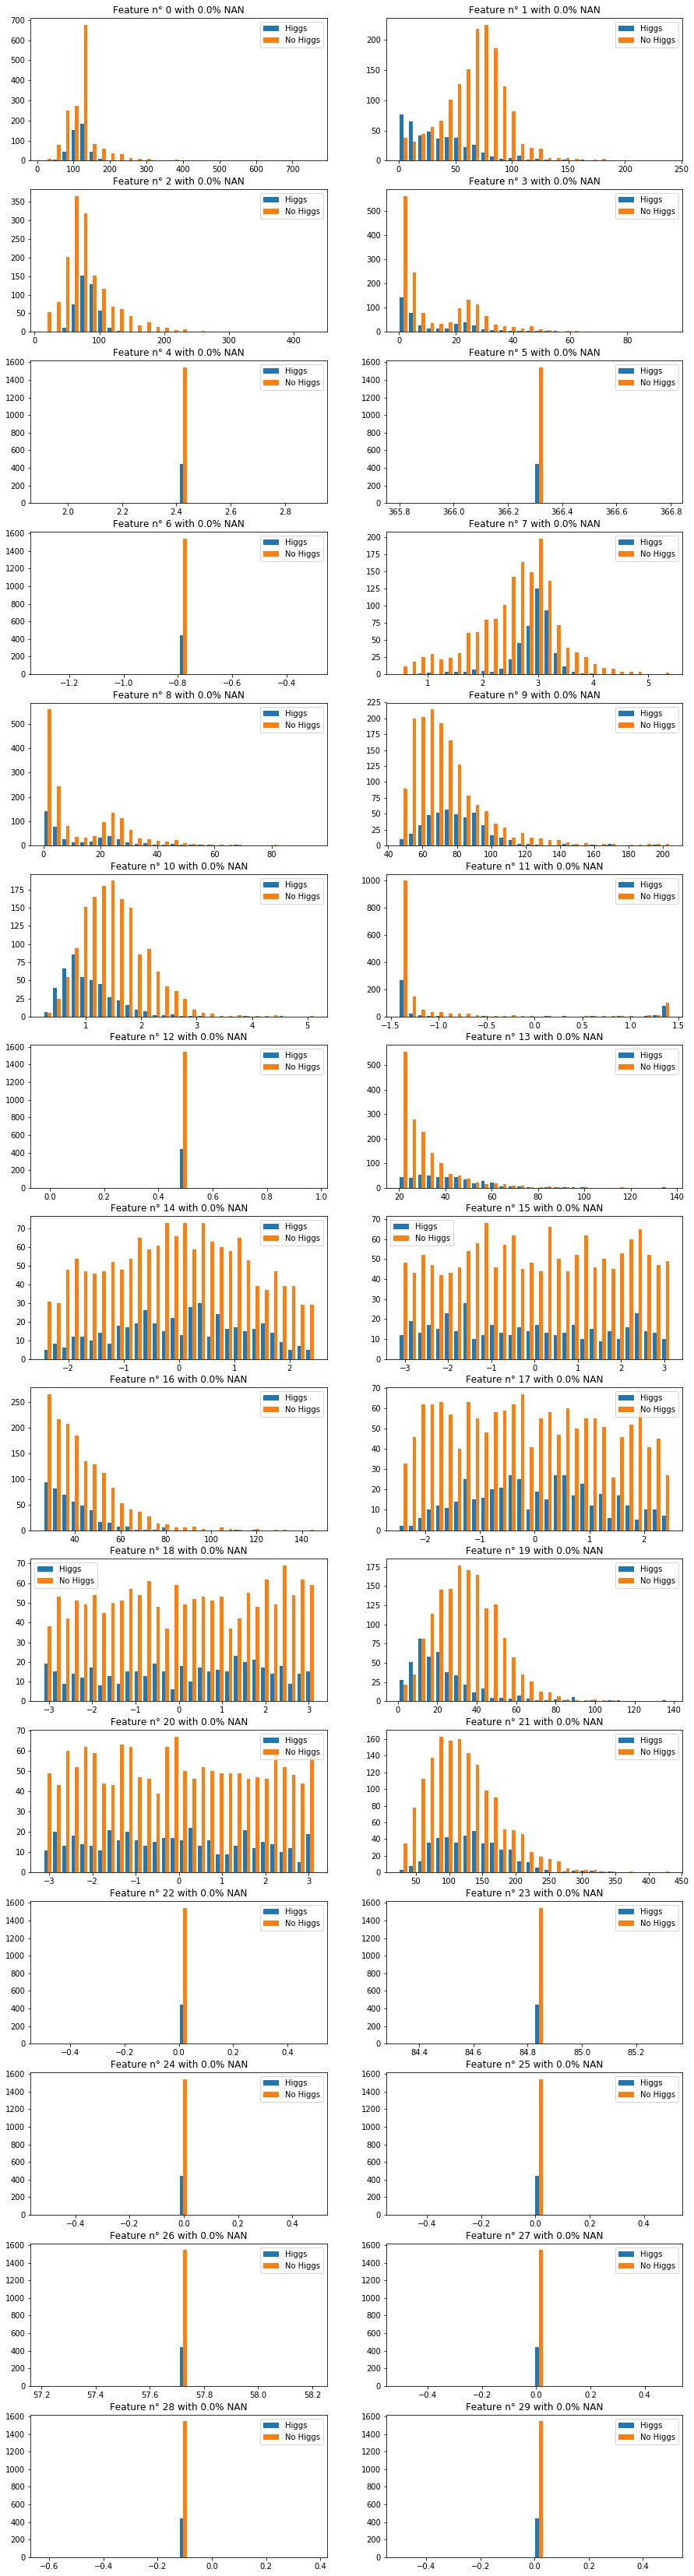

group2


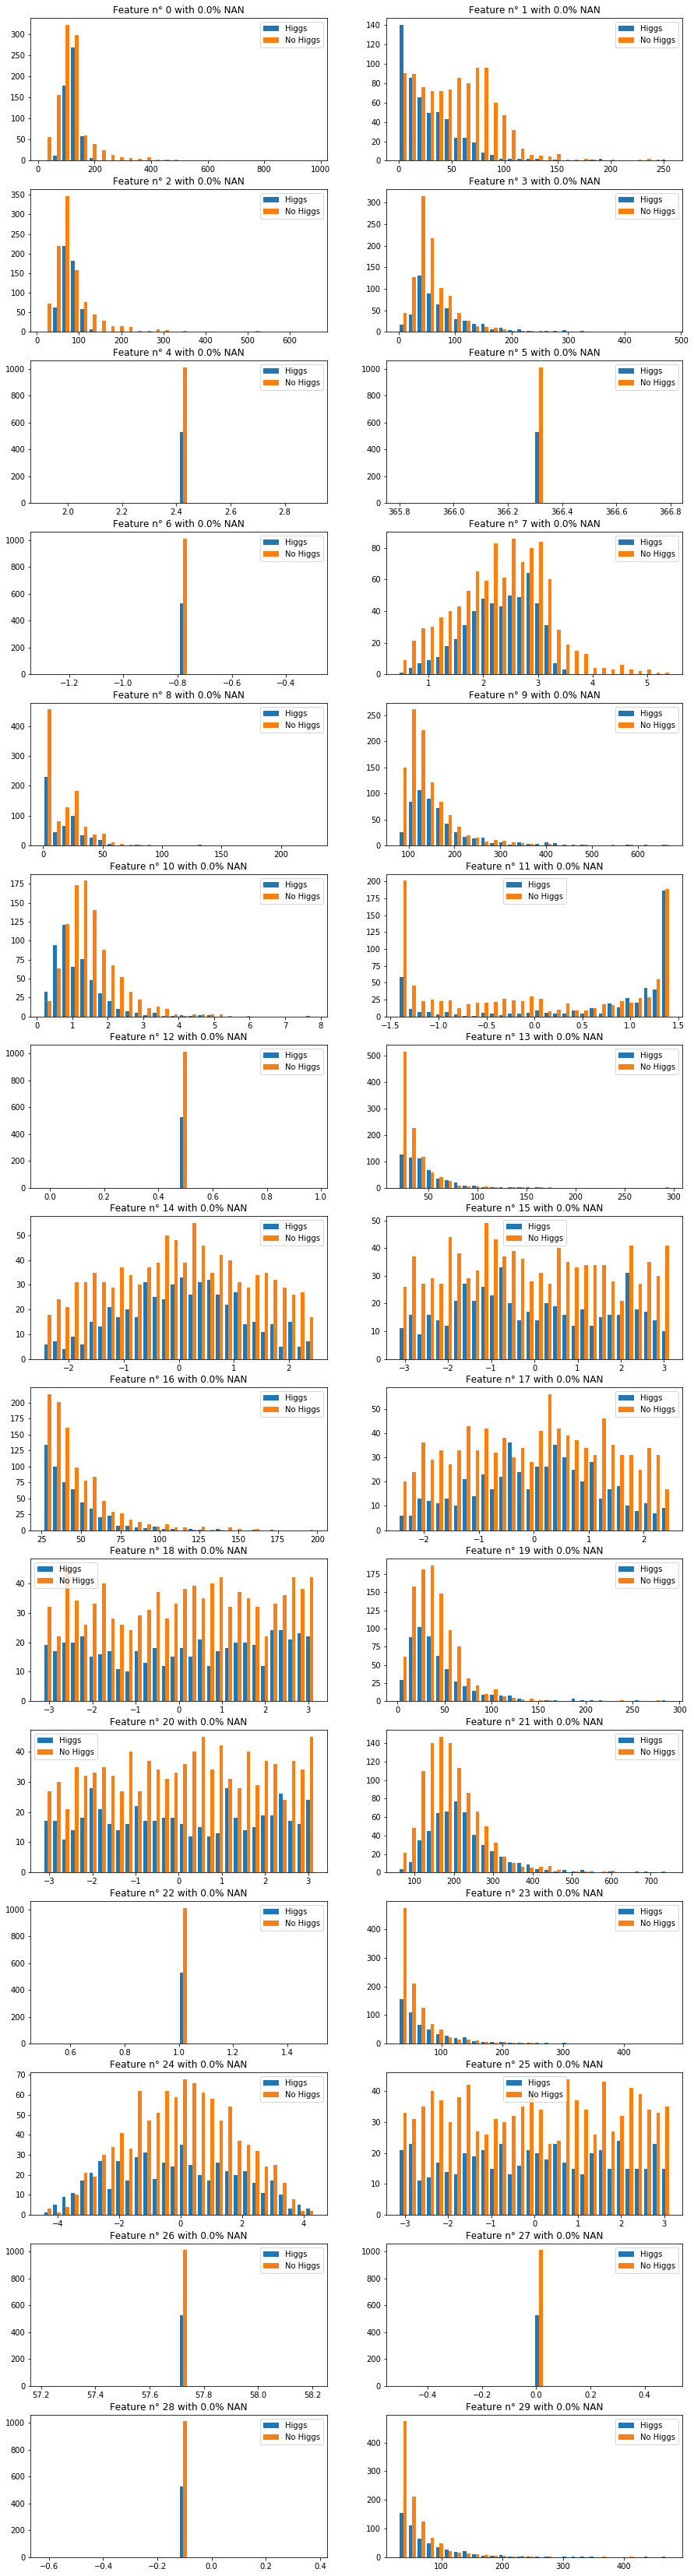

goupe3


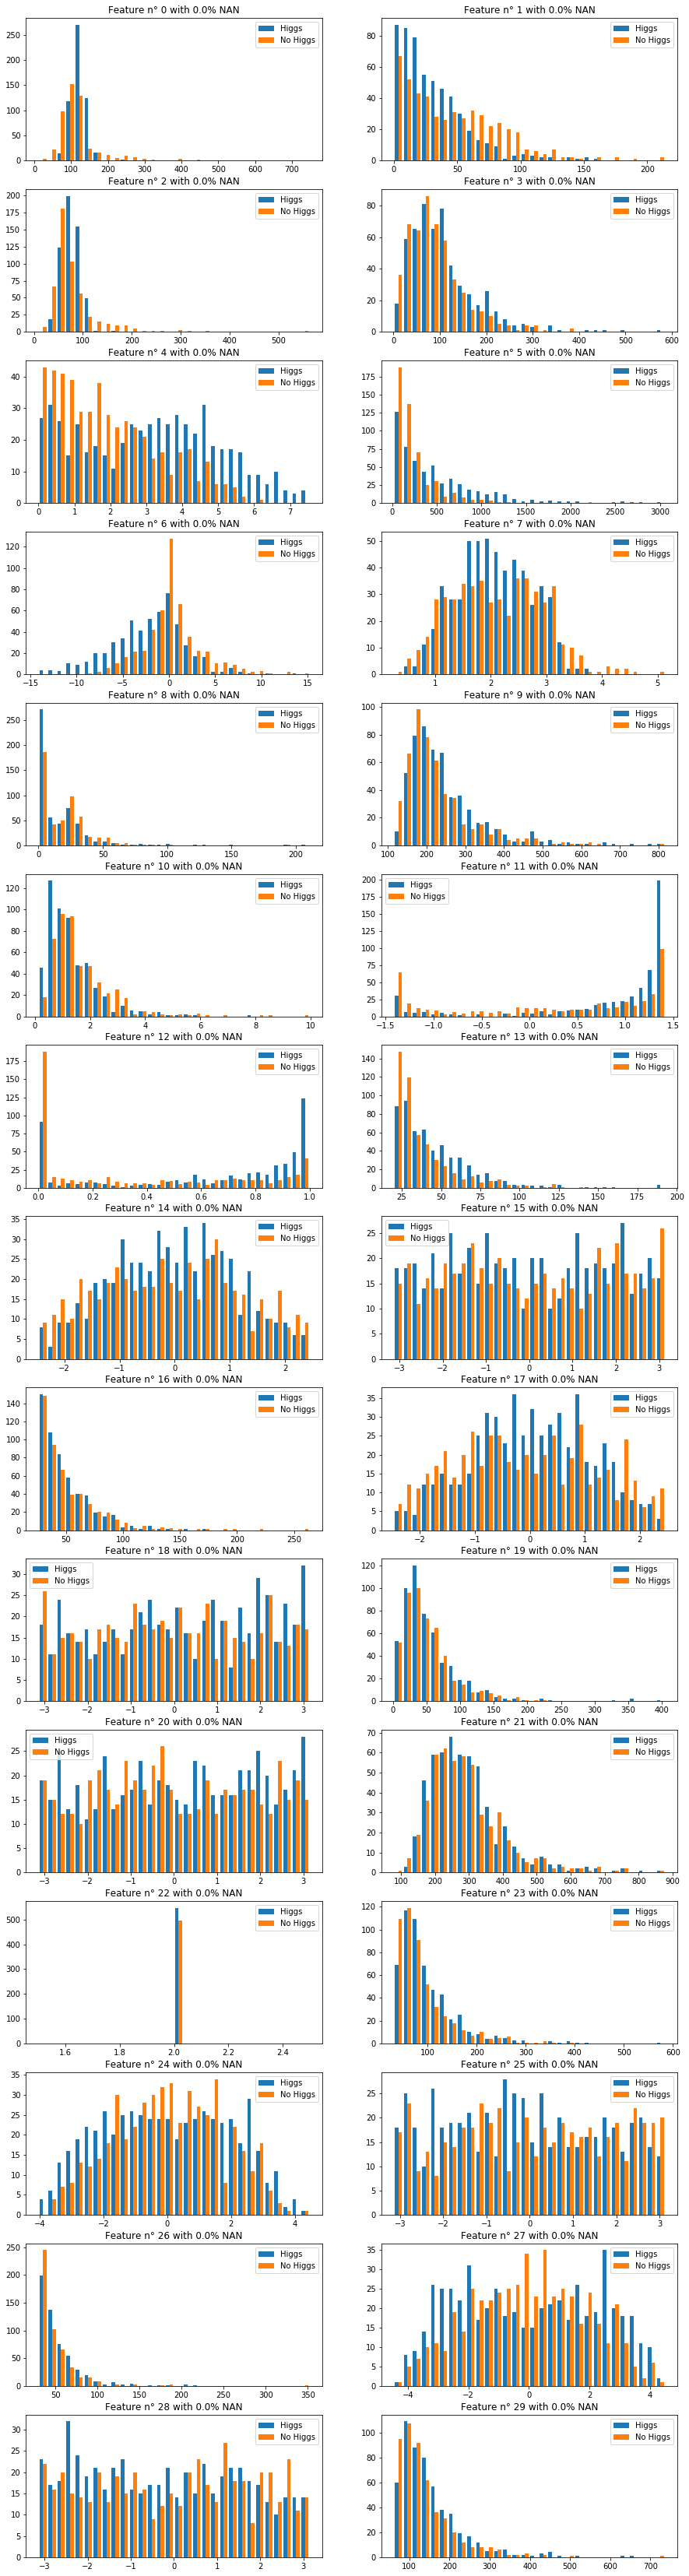

goupe4


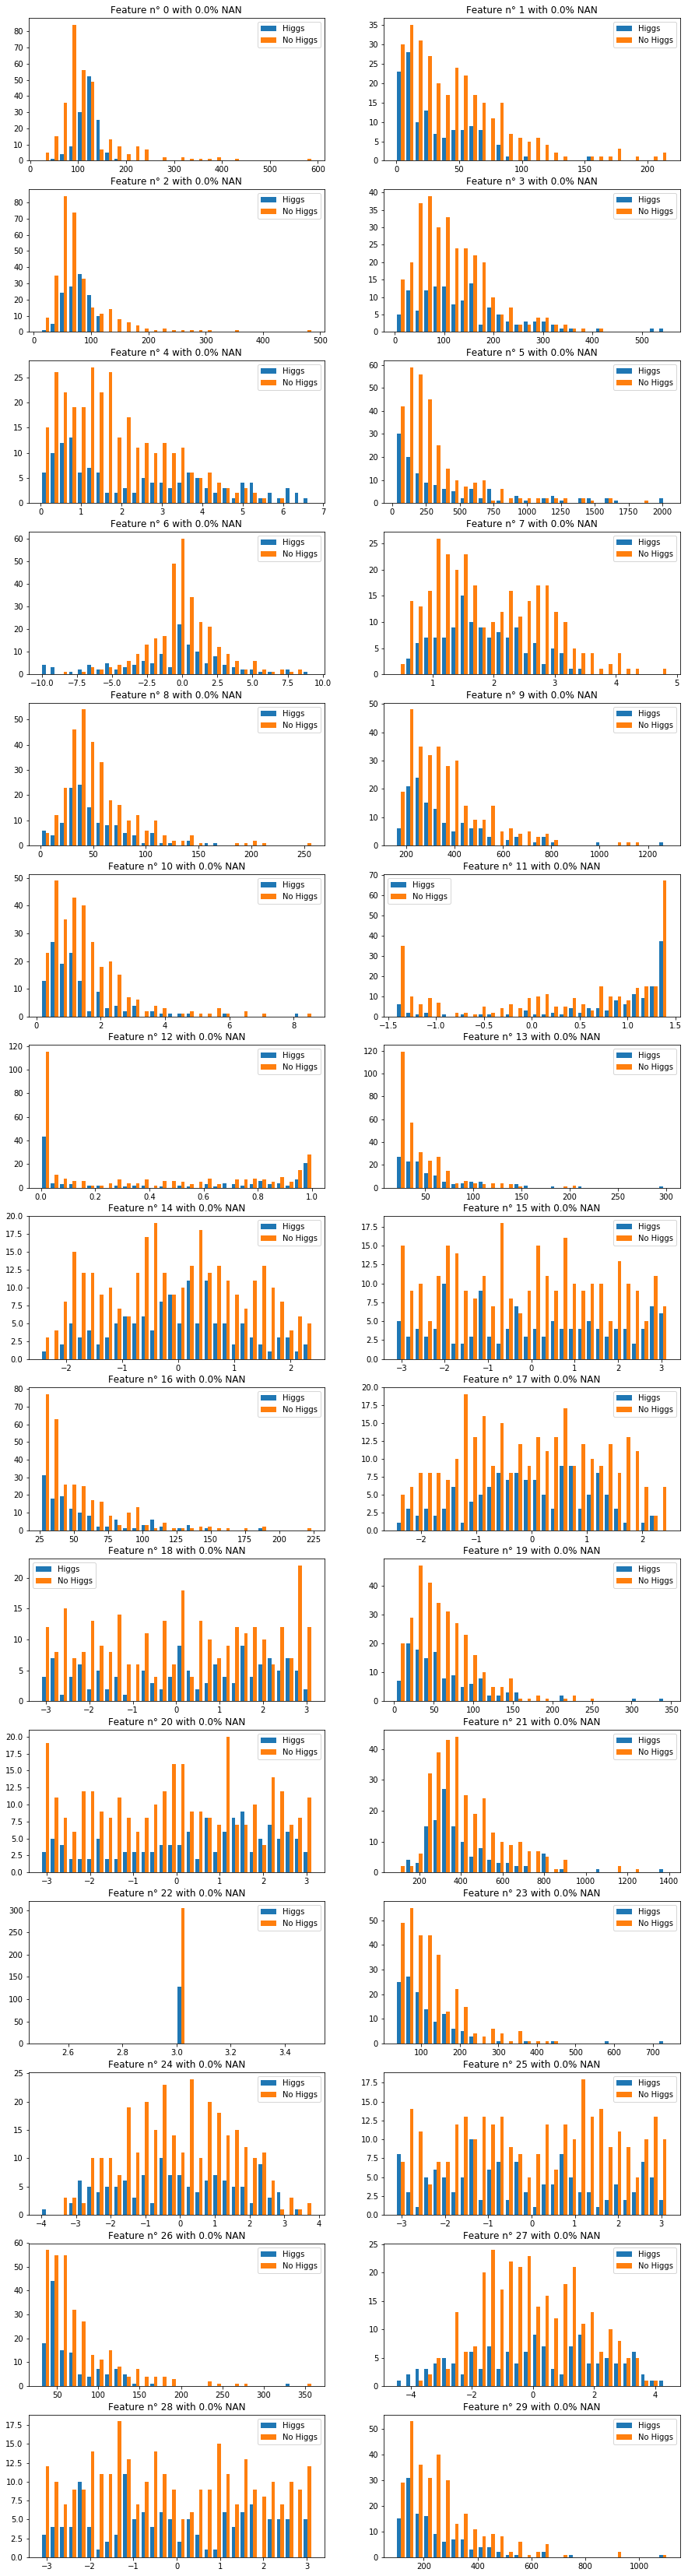

In [12]:
#feature distribution for the different groups tx0, tx1, tx2 and tx3
display_feature_distribution(y0, tx0, 30)
print('group2')
display_feature_distribution(y1, tx1, 30)
print('goupe3')
display_feature_distribution(y2, tx2, 30)
print('goupe4')
display_feature_distribution(y3, tx3, 30)

### focus on group0

In [18]:
# group0: tx0 and y0

#all features correlation calculation
features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

for i, feature in enumerate(x.T):
    print("Correlation feature {0} : {1}".format(i, abs(corr_pear(y0, tx0, i))))

Correlation feature 0 : 0.01598009981681445
Correlation feature 1 : 0.314184345920351
Correlation feature 2 : 0.008613151420072858
Correlation feature 3 : 0.007155274297910181
Correlation feature 4 : 2.3954279458298497e-17
Correlation feature 5 : 7.279088577913394e-17
Correlation feature 6 : 4.5200189820723227e-17
Correlation feature 7 : 0.003379518837515272
Correlation feature 8 : 0.011505247632422888
Correlation feature 9 : 0.05435150921284335
Correlation feature 10 : 0.004947336083226827
Correlation feature 11 : 0.004308504855334385
Correlation feature 12 : 8.50804777052609e-17
Correlation feature 13 : 0.28078033400689184
Correlation feature 14 : 0.0007766445861458297
Correlation feature 15 : 0.0022050876344866586
Correlation feature 16 : 0.10111284194828876
Correlation feature 17 : 0.0010794841022148556
Correlation feature 18 : 0.0002858862746592161
Correlation feature 19 : 0.25886579961725825
Correlation feature 20 : 0.001316276087437233
Correlation feature 21 : 0.0602087557785808

#### -> features 1, 13, 16, 19 are beautiful

In [92]:
features = list(range(tx0.shape[1]))
features_all0= np.ndarray((tx0.shape[0], tx0.shape[1], 7))
features_all0[:,:,0] = tx0
features_all0.shape


(1985, 30, 7)

apply COS

In [93]:
features_all0[:,:,1] = transform_feature_cos(tx0, features)

apply SIN

In [94]:
features_all0[:,:,2] = transform_feature_sin(tx0, features)

apply LOG

In [95]:
features_all0[:,:,3] = transform_feature_cos(tx0, features)

apply feature*logfeature

In [96]:
features_all0[:,:,4] = transform_feature_log_feature(tx0, features)

apply x2

In [97]:
features_all0[:,:,5] = transform_feature_power(tx0, features, 2)

apply x3

In [98]:
features_all0[:,:,6] = transform_feature_power(tx0, features, 3)

Compute Corr

In [99]:
corr_all0= np.ndarray((tx0.shape[1], 7 ))
corr_all0.shape

(30, 7)

In [101]:
for op in list(range(features_all0.shape[2])):
    corr_all0[:,op] =np.abs(compute_corr_features(y0, features_all0[:,:,op], 'all'))

for feature in features :
    print(np.argmax(corr_all0[feature, :]))

1
4
6
2
4
2
2
2
2
5
1
2
0
0
1
2
4
1
2
0
1
5
1
1
4
2
5
6
4
1


In [127]:
def try_many_distributions(tx, y):
    
    best_feature = []
    features = list(range(tx.shape[1]))
    features_all = np.ndarray((tx.shape[0], tx.shape[1], 7))
    features_all[:,:,0] = tx
    corr_all = np.ndarray((tx.shape[1], 7 ))
    
    features_all[:,:,1] = transform_feature_cos(tx, features)
    features_all[:,:,2] = transform_feature_sin(tx, features)
    features_all[:,:,3] = transform_feature_cos(tx, features)
    features_all[:,:,4] = transform_feature_log_feature(tx, features)
    features_all[:,:,5] = transform_feature_power(tx, features, 2)
    features_all[:,:,6] = transform_feature_power(tx, features, 3)
    
    for op in list(range(features_all.shape[2])):
        corr_all[:,op] = np.abs(compute_corr_features(y, features_all[:,:,op], 'all'))

    for feature in features :
        best_feature.append(np.argmax(corr_all[feature, :]))
    
    return best_feature, features_all

In [121]:
best_feat_0 = try_many_distributions(tx0, y0)
best_feat_1 = try_many_distributions(tx1, y1)
best_feat_2 = try_many_distributions(tx2, y2)
best_feat_3 = try_many_distributions(tx3, y3)
print(best_feat_0)
print(best_feat_1)
print(best_feat_2)
print(best_feat_3)

[1, 4, 6, 2, 4, 2, 2, 2, 2, 5, 1, 2, 0, 0, 1, 2, 4, 1, 2, 0, 1, 5, 1, 1, 4, 2, 5, 6, 4, 1]
[5, 0, 5, 4, 5, 5, 6, 2, 1, 5, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 6, 2, 4, 1, 1, 0, 2, 2, 4]
[6, 0, 5, 4, 2, 4, 1, 2, 1, 5, 1, 2, 2, 0, 1, 1, 5, 1, 2, 0, 2, 2, 1, 4, 1, 2, 0, 1, 2, 4]
[2, 0, 5, 6, 2, 6, 1, 2, 1, 6, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 6, 0, 1, 2, 2, 1, 2, 2]


### initialize nouvelle matrice avec meilleures features

In [132]:
def gather_features_distribution(tx, y):
    best_feat, feature_all = try_many_distributions(tx, y)
    
    for feature in list(range(tx.shape[1])):
        tx[:,feature] = feature_all[:, feature, best_feat[feature]]
    
    return tx


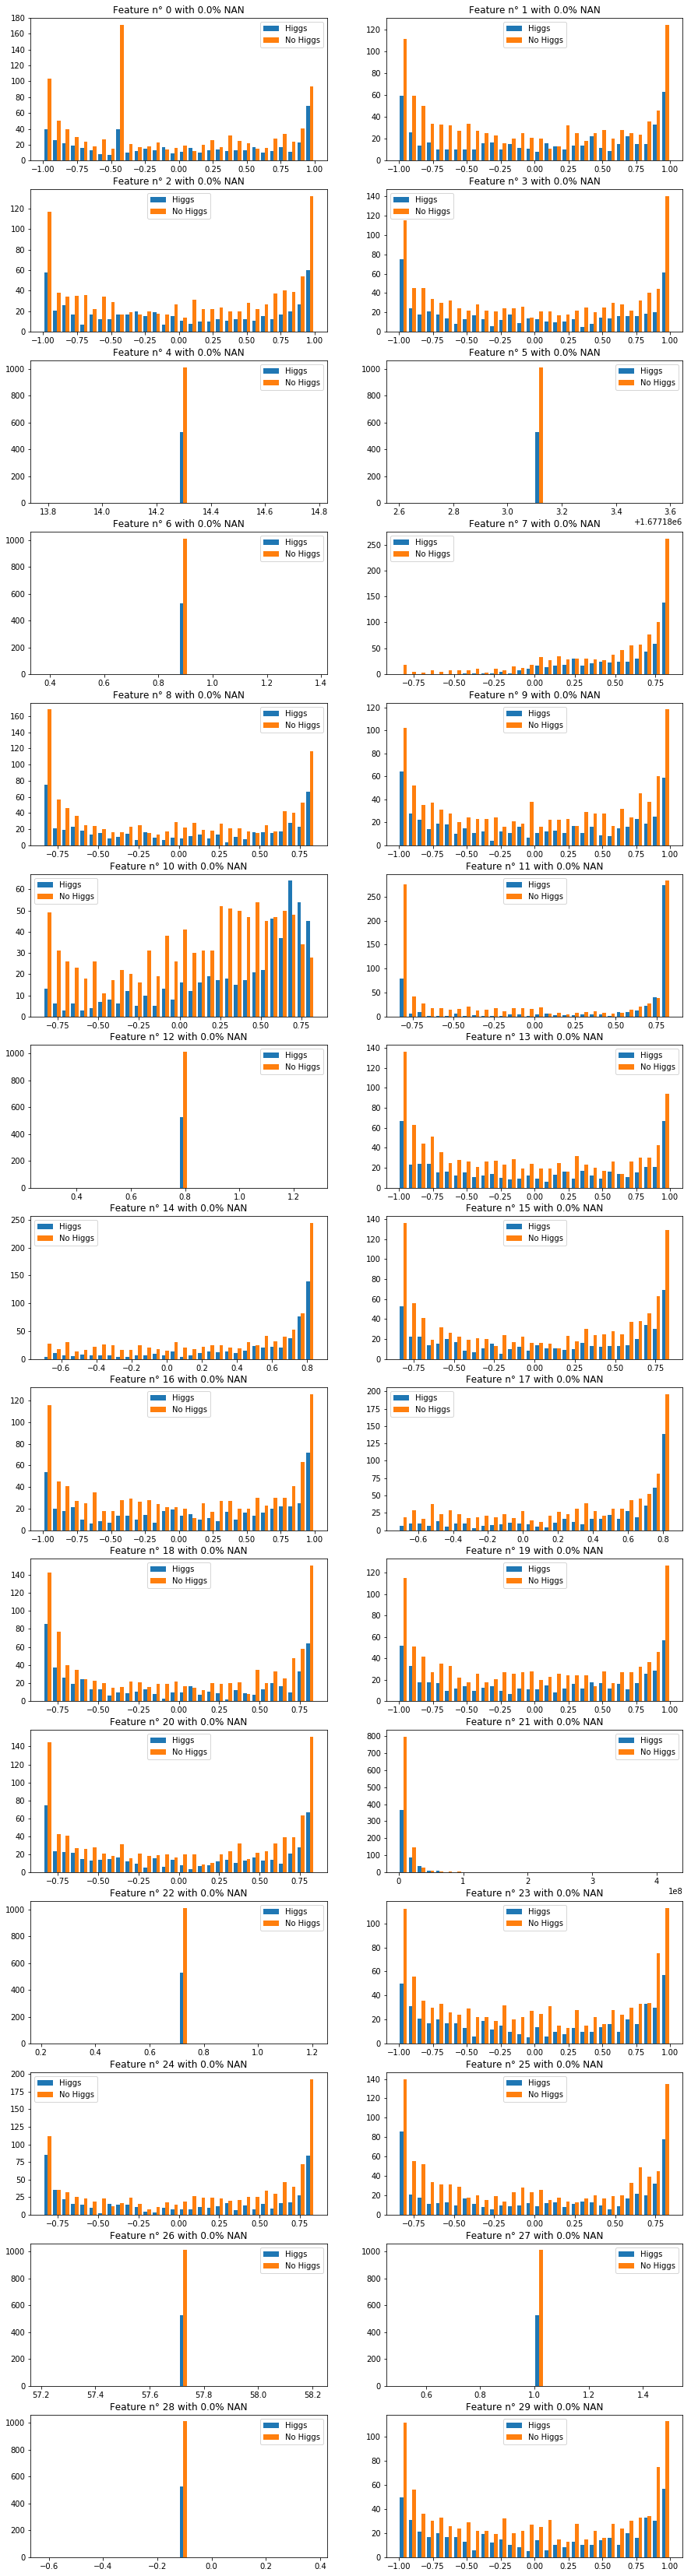

In [144]:
tx0_best = gather_features_distribution(tx0, y0)
tx1_best = gather_features_distribution(tx1, y1)
tx2_best = gather_features_distribution(tx2, y2)
tx3_best = gather_features_distribution(tx3, y3)

display_feature_distribution(y1, tx1_best, 30)

### standardize matrices

In [163]:
tx0_best_st = standardize(tx0_best)
tx1_best_st = standardize(tx1_best)
tx2_best_st = standardize(tx2_best)
tx3_best_st = standardize(tx3_best)

In [178]:

(l, c) = np.shape(tx0)
initial_w = np.zeros(c)
max_iters = 1000
gamma = 0.0003
losses0, ws0 = log_gradient_descent(y0, tx0_best_st, initial_w, max_iters, gamma)
losses1, ws1 = log_gradient_descent(y1, tx1_best_st, initial_w, max_iters, gamma)
losses2, ws2 = log_gradient_descent(y2, tx2_best_st, initial_w, max_iters, gamma)
losses3, ws3 = log_gradient_descent(y3, tx3_best_st, initial_w, max_iters, gamma)


In [179]:
print(losses0)

[1375.8971534114241, 1379.8118391327002, 1373.135881829499, 1373.161477225634, 1373.0979818829846, 1373.1111651152248, 1373.071850652873, 1373.0785015048382, 1373.0527115382672, 1373.0557274314074, 1373.0380710136694, 1373.0390035635744, 1373.0264859722067, 1373.0262111488196, 1373.0170575725647, 1373.0160865931884, 1373.0091945535546, 1373.0078314826512, 1373.0024914684823, 1373.0009185030522, 1372.9966612279622, 1372.9949871603662, 1372.9914954294543, 1372.989784208027, 1372.9868398417398, 1372.9851278564176, 1372.9825786051604, 1372.980885344837, 1372.9786236768114, 1372.976958376418, 1372.9749075590832, 1372.9732733672834, 1372.9713781571716, 1372.9697747471648, 1372.9679950606844, 1372.9664202535912, 1372.9647268049755, 1372.9631775638595, 1372.961548823293, 1372.9600218460973, 1372.9584418966547, 1372.9569339548034, 1372.9553909689848, 1372.953899086498, 1372.9523842345654, 1372.9509057690275, 1372.9494124310277, 1372.9479450958438, 1372.946468289172, 1372.9450101424788, 1372.943

In [180]:
l0, w0 = minimum_loss_vector(losses0, ws0)
l1, w1 = minimum_loss_vector(losses1, ws1)
l2, w2 = minimum_loss_vector(losses2, ws2)
l3, w3 = minimum_loss_vector(losses3, ws3)
print(l0, w0)
print(l1, w1)
print(l2, w2)
print(l3, w3)

1371.7226496517424 [ 4.26810746e-05 -8.20494876e-06 -2.52588570e-02 -4.64304755e-06
 -5.96333602e-16  3.66598526e-18 -5.49897789e-18  1.85063528e-05
 -4.64304755e-06  1.86408157e-01  6.08335644e-05  3.88812424e-05
  5.20875406e-18  1.07408941e-05  1.05853873e-05 -8.77744081e-06
  3.25169459e-06  2.61558523e-05  1.10867212e-05 -4.54546073e-06
  6.15745570e-06  5.93462100e-01  5.31567863e-18  1.95519214e-18
 -1.77571161e-19 -7.60691941e-18 -1.17564808e-07  6.47657396e-18
 -5.80447666e-19  5.31567863e-18]
1052.6937836283741 [ 2.23195422e-06  1.67948871e-06 -1.01313382e-06 -1.33096876e-06
 -1.77621681e-18 -5.23827651e-13 -1.87335366e-19  1.50480380e-06
  9.30167210e-07 -1.06669111e-06  5.23787042e-06  8.89013693e-06
  5.20376017e-20  1.83111831e-06  3.04215196e-06  8.97200664e-07
  1.19917636e-06  2.76845028e-06 -1.39259651e-06  6.95736522e-07
 -1.17120022e-06  6.78675141e-02 -3.64263212e-20  2.32870583e-07
 -3.79074261e-06  8.68213708e-07  2.23137236e-17 -3.64263212e-20
  2.16823341e-20  